<a href="https://colab.research.google.com/github/albinachudar/lab1/blob/main/lab1%D0%A6%D0%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Heart Attack Analysis

**Age** : Возраст пациента

**Sex** : Пол пациента (0-мужчина, 1-женщина)

**cp** : Тип боли в груди


1.   типичная стенокардия
2.   атипичная стенокардия
3. неангинозная боль
4. бессимптомный

**trtbps** : артериальное давление в покое (в мм рт. ст.)

**chol** : холестораль в мг/дл, полученный с помощью датчика ИМТ

**fbs** : уровень сахара в крови натощак > 120 мг/дл (1 = да; 0 = нет)

**rest_ecg** : результаты электрокардиографии в покое
0.   нормальный
1.   наличие аномалии ST-T
2. указание на возможную или определенную гипертрофию левого желудочка по критериям Эстеса.

**thalach** : достигнута максимальная частота сердечных сокращений

**oldpeak** - Previous peak

**slp** - Slope

**ca**: количество крупных сосудов (0-3)

**exang**: стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)

**thall** - Thalium Stress Test result

**output** : целевая переменная: 0 = меньше вероятность сердечного приступа 1 = больше вероятность сердечного приступа

###Step 1. Files upload

In [96]:
# из библиотеки google.colab импортируем класс files
from google.colab import files

In [97]:
# создаем объект этого класса, применяем метод .upload()
uploaded = files.upload()

Saving heart.csv to heart (2).csv


In [98]:
# посмотрим на содержимое словаря uploaded
uploaded

{'heart.csv': b'age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42,1,0,140,226,0,1,178,0,0,2,

###Step 2. Reading files

####Viewing the contents of a folder /content/

In [99]:
# импортируем модуль os
import os

# выводим пути к папкам (dirpath) и наименования файлов (filenames) и после этого
for dirpath, _, filenames in os.walk('/content/'):
  
  # во вложенном цикле проходимся по названиям файлов
  for filename in filenames:

    # и соединяем путь до папок и входящие в эти папки файлы
    # с помощью метода path.join()
    print(os.path.join(dirpath, filename))

/content/heart (1).csv
/content/heart.csv
/content/heart (2).csv
/content/.config/config_sentinel
/content/.config/active_config
/content/.config/.last_survey_prompt.yaml
/content/.config/.last_opt_in_prompt.yaml
/content/.config/.last_update_check.json
/content/.config/gce
/content/.config/configurations/config_default
/content/.config/logs/2022.11.10/14.30.00.596844.log
/content/.config/logs/2022.11.10/14.29.31.710238.log
/content/.config/logs/2022.11.10/14.29.39.558549.log
/content/.config/logs/2022.11.10/14.29.12.276315.log
/content/.config/logs/2022.11.10/14.29.59.957734.log
/content/.config/logs/2022.11.10/14.28.48.780996.log
/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_train_small.csv


#### Command !ls

In [100]:
# посмотрим на содержимое папки content
!ls

'heart (1).csv'  'heart (2).csv'   heart.csv   sample_data


In [101]:
# заглянем внутрь sample_data
!ls /content/sample_data/

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


####Reading from uploaded variable

In [102]:
# посмотрим на тип значений словаря uploaded
type(uploaded['heart.csv'])

bytes

An example of working with the bytes object

In [103]:
# обратимся к ключу словаря uploaded и применим метод .decode()
uploaded_str = uploaded['heart.csv'].decode()

# на выходе получаем обычную строку
print(type(uploaded_str))

<class 'str'>


In [104]:
# выведем первые 35 значений
print(uploaded_str[:35])

age,sex,cp,trtbps,chol,fbs,restecg,


In [105]:
# если разбить строку методом .split() по символам \r (возврат к началу строки) и \n (новая строка)
uploaded_list = uploaded_str.split('\r\n')

# на выходе мы получим список
type(uploaded_list)

list

In [106]:
# пройдемся по этому списку, не забыв создать индекс с помощью функции enumerate()
for i, line in enumerate(uploaded_list):

  # начнем выводить записи
  print(line)

  # когда дойдем до четвертой строки
  if i == 3:

    # прервемся
    break

age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


####Using the open() function and the with open() construct

In [107]:
# передадим функции open() адрес файла
# параметр 'r' означает, что мы хотим прочитать (read) файл
f1 = open('/content/heart.csv', 'r')

# метод .read() помещает весь файл в одну строку
# выведем первые 142 символа (если параметр не указывать, выведется все содержимое)
print(f1.read(142))

# в конце файл необходимо закрыть
f1.close()

age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.


In [108]:
# снова откроем файл
f2 = open('/content/heart.csv', 'r')

# пройдемся по нашему объекту в цикле for и параллельно создадим индекс
for i, line in enumerate(f2):

    # выведем строки без служебных символов по краям
    print(line.strip())
    
    # дойдя до четвертой строки, прервемся
    if i == 3:
      break

# не забудем закрыть файл
f2.close()

age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [109]:
# скажем Питону: "открой файл  и назови его f3"
with open('/content/heart.csv', 'r') as f3:

  # "пройдись по строкам без служебных символов"
  for i, line in enumerate(f3):
    print(line.strip())
    
    # и "прервись на четвертой строке"
    if i == 3:
      break

age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


####Reading through the Pandas library

In [110]:
# импортируем библиотеку
import pandas as pd

# применим функцию read_csv() и посмотрим на первые три записи файла heart.csv
heart = pd.read_csv('/content/heart.csv')
heart.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


###Step 3. Model building and forecast

####1. Exploratory Data Analysis (EDA)

In [111]:
# посмотрим на данные в целом
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [112]:
# для построения графиков воспользуемся новой для нас библиотекой seaborn
import seaborn as sns

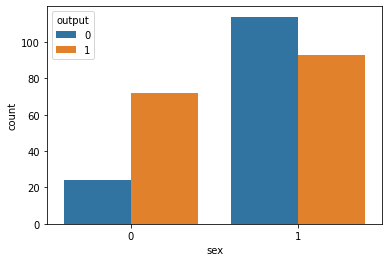

In [113]:
# посмотрим насколько значим пол
# с помощью x и hue мы можем уместить две категориальные переменные на одном графике
sns.countplot(x = 'sex', hue = 'output', data = heart)

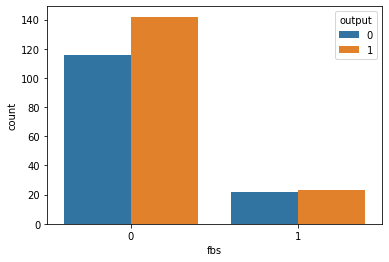

In [125]:
# посмотрим насколько значим уровень сахара
sns.countplot(x = 'fbs', hue = 'output', data = heart)
# практически не влияет, удалим позже

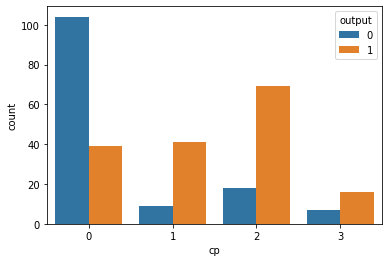

In [115]:
# посмотрим насколько значим тип болей в груди
sns.countplot(x = 'cp', hue = 'output', data = heart)

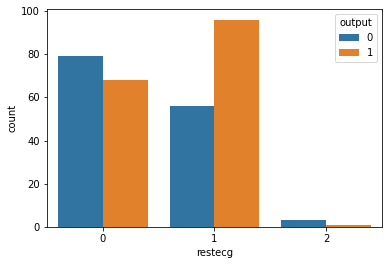

In [116]:
# посмотрим насколько значимы результаты электрокардиографии в покое
sns.countplot(x = 'restecg', hue = 'output', data = heart)

Missing values

In [117]:
# выявим пропущенные значения с помощью .isnull() и посчитаем их количество через sum()
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [118]:
#не знаю значение переменных oldpeak, slp
#избавлюсь от них с помощью метода .drop()
# (параметр axis = 1 отвечает за столбцы, inplace = True сохраняет изменения)
heart.drop(columns = 'slp', axis = 1, inplace = True)

In [119]:
heart.drop(columns = 'oldpeak', axis = 1, inplace = True)

In [120]:
# посмотрим на результат
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
caa         0
thall       0
output      0
dtype: int64

Categorical variables

In [121]:
# применим one-hot encoding к переменным cp, restecg с помощью метода .get_dummies()
cp = pd.get_dummies(heart['cp'], drop_first = True)
restecg = pd.get_dummies(heart['restecg'], drop_first = True)

In [123]:
# присоединим закодированные через one-hot encoding переменные
# к исходному датафрейму через функцию .concat()
heart = pd.concat([heart, cp, restecg], axis = 1)
heart.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,...,1,2,3,1,2,1,2,3,1,2
0,63,1,3,145,233,1,0,150,0,0,...,0,0,1,0,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,0,...,0,1,0,1,0,0,1,0,1,0
2,41,0,1,130,204,0,0,172,0,0,...,1,0,0,0,0,1,0,0,0,0


In [124]:
# удалим те столбцы, которые нам теперь не нужны
heart.drop(['cp', 'restecg'], axis = 1, inplace = True)
heart.head(3)

,age,sex,trtbps,chol,fbs,thalachh,exng,caa,thall,output,1,2,3,1,2,1,2,3,1,2
0,63,1,145,233,1,150,0,0,1,1,0,0,1,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,0,2,1,0,1,0,1,0,0,1,0,1,0
2,41,0,130,204,0,172,0,0,2,1,1,0,0,0,0,1,0,0,0,0


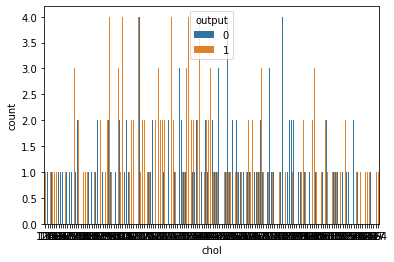

In [129]:
# вспомним, что fbs на данные особо не влияет
# проверим как влияет chol
sns.countplot(x = 'chol', hue = 'output', data = heart)
# особо ничего непонятно, так как значения абсолютно разные, но 
# столбцов, которые выходят за предел 1.0 меньше, чем равных ему
# думаю, если удалить столбец, прогнозировать будет легче, и данные практически не изменятся

In [130]:
heart.drop(['fbs', 'chol'], axis = 1, inplace = True)
heart.head(3)

,age,sex,trtbps,thalachh,exng,caa,thall,output,1,2,3,1,2,1,2,3,1,2
0,63,1,145,150,0,0,1,1,0,0,1,0,0,0,0,1,0,0
1,37,1,130,187,0,0,2,1,0,1,0,1,0,0,1,0,1,0
2,41,0,130,172,0,0,2,1,1,0,0,0,0,1,0,0,0,0


In [132]:
# добавлю от себя, trtbps - чсс в спокойном состоянии, thalachh - чсс максимальное
# найду разницу между столбами, столбцов меньше, данные лучше
heart['diff'] = heart['thalachh'] - heart['trtbps']

In [134]:
# посмотрим, что получилось, удалив столбцы trtbps и thalachh
heart.drop(['trtbps', 'thalachh'], axis = 1, inplace = True)
heart.drop(['cp', 'restecg'], axis = 1, inplace = True)
heart.head(3)

,age,sex,exng,caa,thall,output,1,2,3,1,2,1,2,3,1,2,diff
0,63,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,5
1,37,1,0,0,2,1,0,1,0,1,0,0,1,0,1,0,57
2,41,0,0,0,2,1,1,0,0,0,0,1,0,0,0,0,42


In [135]:
# забыла про thall
thall = pd.get_dummies(heart['thall'], drop_first = True)
heart = pd.concat([heart, thall], axis = 1)
heart.drop('thall', axis = 1, inplace = True)
heart.head(3)

,age,sex,exng,caa,output,1,2,3,1,2,1,2,3,1,2,diff,1,2,3
0,63,1,0,0,1,0,0,1,0,0,0,0,1,0,0,5,1,0,0
1,37,1,0,0,1,0,1,0,1,0,0,1,0,1,0,57,0,1,0
2,41,0,0,0,1,1,0,0,0,0,1,0,0,0,0,42,0,1,0


Data normalization

In [136]:
# импортируем класс StandardScaler
from sklearn.preprocessing import StandardScaler
 
# создадим объект этого класса
scaler = StandardScaler()
 
# выберем те столбцы, которые мы хотим масштабировать
cols_to_scale = ['age', 'diff']

# рассчитаем среднее арифметическое и СКО для масштабирования данных
scaler.fit(heart[cols_to_scale])

# применим их
heart[cols_to_scale] = scaler.transform(heart[cols_to_scale])

# посмотрим на результат
heart.head(3)

,age,sex,exng,caa,output,1,2,3,1,2,1,2,3,1,2,diff,1,2,3
0,0.952197,1,0,0,1,0,0,1,0,0,0,0,1,0,0,-0.442318,1,0,0
1,-1.915313,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1.323816,0,1,0
2,-1.474158,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0.814354,0,1,0


In [137]:
# некоторые названия столбцов теперь представляют собой числа, так быть не должно
heart.columns

Index([   'age',    'sex',   'exng',    'caa', 'output',        1,        2,
              3,        1,        2,        1,        2,        3,        1,
              2,   'diff',        1,        2,        3],
      dtype='object')

In [138]:
# преобразуем эти переменные в тип str через функцию map()
heart.columns = heart.columns.map(str)
heart.columns

Index(['age', 'sex', 'exng', 'caa', 'output', '1', '2', '3', '1', '2', '1',
       '2', '3', '1', '2', 'diff', '1', '2', '3'],
      dtype='object')

####2. Dividing the training sample into features (X_heart) and target variable (y_heart)

In [140]:
# поместим в X_heart все кроме столбца output
X_heart = heart.drop('output', axis = 1)

# столбец 'putput' станет нашей целевой переменной (y_heart)
y_heart = heart['output']

In [141]:
X_heart.head(3)

,age,sex,exng,caa,1,2,3,1,2,1,2,3,1,2,diff,1,2,3
0,0.952197,1,0,0,0,0,1,0,0,0,0,1,0,0,-0.442318,1,0,0
1,-1.915313,1,0,0,0,1,0,1,0,0,1,0,1,0,1.323816,0,1,0
2,-1.474158,0,0,0,1,0,0,0,0,1,0,0,0,0,0.814354,0,1,0


####3. Train the logistic regression model

Train the Model

In [142]:
# импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression

# создадим объект этого класса и запишем его в переменную model
model = LogisticRegression()

# обучим нашу модель
model.fit(X_heart, y_heart)

LogisticRegression()

Let's make a prediction on the training sample

In [143]:
# сделаем предсказание класса на обучающей выборке
y_pred_heart = model.predict(X_heart)

Evaluation of the quality of the model on the training sample

In [144]:
# построим матрицу ошибок
from sklearn.metrics import confusion_matrix

# передадим ей фактические и прогнозные значения
conf_matrix = confusion_matrix(y_heart, y_pred_heart)

# преобразуем в датафрейм
conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

,0,1
0,111,27
1,16,149


In [145]:
# для удобства можем добавить подписи
conf_matrix_labels = pd.DataFrame(conf_matrix, columns = ['Пр. приступ маловероятен', 'Пр. приступ вероятен'], index = ['Факт приступ маловероятен', 'Факт приступ верятен'])
conf_matrix_labels

,Пр. приступ маловероятен,Пр. приступ вероятен
Факт приступ маловероятен,111,27
Факт приступ верятен,16,149


In [146]:
# рассчитаем метрику accuracy вручную
round((111 + 149)/(111 + 149 + 27 + 16), 3)

0.858

In [147]:
# импортируем метрику accuracy из sklearn
from sklearn.metrics import accuracy_score

# так же передадим ей фактические и прогнозные значения
model_accuracy = accuracy_score(y_heart, y_pred_heart)

# округлим до трех знаков после запятой
round(model_accuracy, 3)

0.858

####4. Building a prediction on a test sample

In [149]:
# посмотрим на тестовые данные
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     303 non-null    float64
 1   sex     303 non-null    int64  
 2   exng    303 non-null    int64  
 3   caa     303 non-null    int64  
 4   output  303 non-null    int64  
 5   1       303 non-null    uint8  
 6   2       303 non-null    uint8  
 7   3       303 non-null    uint8  
 8   1       303 non-null    uint8  
 9   2       303 non-null    uint8  
 10  1       303 non-null    uint8  
 11  2       303 non-null    uint8  
 12  3       303 non-null    uint8  
 13  1       303 non-null    uint8  
 14  2       303 non-null    uint8  
 15  diff    303 non-null    float64
 16  1       303 non-null    uint8  
 17  2       303 non-null    uint8  
 18  3       303 non-null    uint8  
dtypes: float64(2), int64(4), uint8(13)
memory usage: 18.2 KB


Шаг 4 я пропустила, так как не имею тестовую выборку.

###Step 4. Saving a new file on the Google server

Создание файла с прогнозом

In [151]:
# у меня нет id пациента, вместо него возьму возраст
age = heart['age']

# создадим датафрейм из словаря, в котором
# первая пара ключа и значения - это age пассажира, вторая - прогноз "на тесте"
result = pd.DataFrame({'age': age, 'output': y_pred_heart})

# посмотрим, что получилось
result.head()

,age,output
0,0.952197,1
1,-1.915313,1
2,-1.474158,1
3,0.180175,1
4,0.290464,1


In [152]:
# создадим новый файл result.csv с помощью функции to_csv(), удалив при этом индекс
result.to_csv('result.csv', index = False)

# файл будет сохранен в 'Сессионном хранилище' и, если все пройдет успешно, выведем следующий текст:
print('Файл успешно сохранился в сессионное хранилище!')

Файл успешно сохранился в сессионное хранилище!


###Step 5. Downloading back to HDD

In [153]:
# применим метод .download() объекта files
files.download('/content/result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>